In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import (zscore, norm, ttest_ind)

# ___Testing a Population Proportion___
------------

In [7]:
# We'll be treating this as a simple random sample.

oil_temps = pd.read_csv("./../data/MetroPT3(AirCompressor).csv", usecols = ["Oil_temperature"]).values.ravel()

In [8]:
oil_temps.min(), oil_temps.max()

(15.400000000000006, 83.125)

---------------------
### ___Null hypothesis $(H_0)$: The proportion of temperatures above $60 \degree C$ is 0.5___
### ___Alternative hypothesis $(H_1)$: The proportion of temperatures above $60 \degree C$ is less than 0.5___
--------------------

In [9]:
# Proportion of temperature values that are above 60 degrees celsius.

prop = (oil_temps > 60).mean()
prop

0.49361949361949364

In [10]:
# We'll define our significance to be 0.05

alpha = 0.05

## ___Test Statistic___
------------------

# ___$= \frac{(best~estimate - hypothesized~estimate)}{stderr~of~estimate}$___

# ___$stderr_{null} = \sqrt{\frac{P_{null}(1 - P_{null})}{n}}$___

In [11]:
# We cannot technically calculate the standard error for the alternative hypothesis, because we do not know the 
# hypothesized estimate for the alternative hypothesis, 
# H1 claims that the proportion is less than 0.5, but that includes a range of values which we cannot substitute for P in the equation.


In [12]:
# Best estimate is the proportion of values that are above 60 in the sample.

best_est = (oil_temps > 60).mean()
best_est

0.49361949361949364

In [13]:
# Since we are dealing with proportions, standard error is defined as the square root of {proportion * (1 - proportion) / sample size}

stderr = np.sqrt(best_est * (1 - best_est) / oil_temps.size)
stderr

0.0004999595374606503

In [14]:
# For Null hypothesis, hypothesized estimate is 0.5
# The test statistic z will be,

z = (best_est - 0.5) / stderr
z

-12.762045530551639

In [15]:
# We annotate this test statistic as z, because we are dealing with a proportion that follows a normal distribution, 
# given that our sample is large enough, we can annotate this statistic as z value.

## ___Meaning of the Test Statistic___
-------------------

In [16]:
# The value of the test statistic tells us that the true population proportion is z times the null standard errors
# above or below (depends on the sign of the z score) the hypothesized population proportion.

In [17]:
# i.e a test statistic of -12.762 tells us that the true population proportion is -12.762 * stderr_null below the hypothesized population
# proportion.

0.5 + (z * stderr)

0.49361949361949364

In [18]:
best_est

0.49361949361949364

In [19]:
# The Z test statistic is a random variable, that has a distribution.
# Z statistic follows a standard normal distribution. (ranging from 0 to 1).
# This standard normal nature comes from centering & scaling our original data.

In [20]:
# centering :  best_est - hyp_est (subtracting the hypothesized estimate)
# scaling : (best_est - hyp_est) / stderr (division by the standard error)

## ___P Values___
---------------

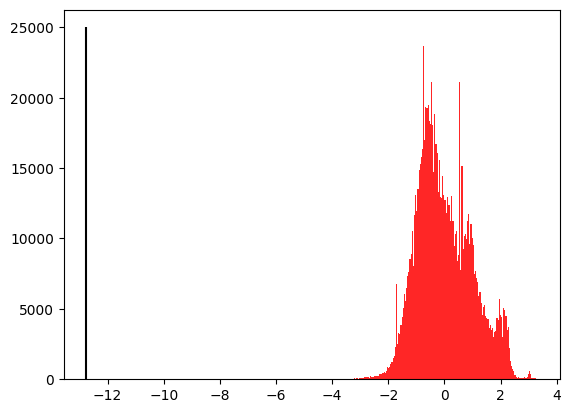

In [21]:
# Once we have a t statistic at hand, we can compute a p value from it.
# p values also have a standard normal distribution.

plt.hist(zscore(oil_temps), bins = 250, alpha = 0.85, color = "red")
plt.vlines(z, ymin = 0, ymax = 25000, color = "black")
plt.show()

In [22]:
# The alternative hypothesis was that the population proportion of temperatures above 60 is less than 0.5
# So, our z score corresponds to the hypothesized null proportion, 0.5
# Since H1 references a proportion less than the null proportion, we need the area on the left of the line.

# Which is virtually nothing.

In [34]:
# Cumulative distribution function tells us the probability of a random value from a select distribution to be found at or less than the
# specified limit.

# P value is,

p = norm.cdf(z)
p

1.3354694904265272e-37

In [36]:
# That is a very small value, that is way smaller than our specified significance (alpha).
# So, we'll reject the Null hypothesis.
# So, we cannot say that the proportion of temperatures above 60 degrees celsius is 0.5 in the population.

In [37]:
# To put our analyses into words,
# There's adequate evidence to believe that the population proportion of temperatures above 60 degrees celsius is less than 0.5
# or 50%

In [26]:
# Say that our z score was a positive value,

z_dummy = 0.79841
norm.cdf(z_dummy)

0.7876836989700404

In [29]:
# P value is the area of the z curve, that is covered by our computed z score.
# The side of coverage depends on the relationship we specify in the alternative hypothesis.
# if we say that the proportion is less than 0.5, then we need to find the fraction of the area of the curve, on the left side of the z line.
# if we say that the proportion is above 0.5, then we should find the area on the right side of the line.

# left side area,

norm.cdf(z_dummy)

0.7876836989700404

In [30]:
# right side,

1 - norm.cdf(z_dummy)

0.21231630102995958

In [4]:
# This notebook is partially incomplete. :(

In [48]:
# Let's try again with a simulated population.

population = np.random.binomial(n = 1, p = 0.55, size = 10_000_000)

In [51]:
# Proportion of ones in the population.

prop_pop = population.mean()
prop_pop

0.5500059

In [52]:
# Let's make a sample,

sample = population[np.random.randint(low = 0, high = population.size, size = 5_000)]
prop_sample = sample.mean()
prop_sample

0.5416

In [53]:
# Null hypothesis: Population proportion of ones is 0.54
# Alternative hypothesis: Population proportion of ones is greater than 0.54

In [55]:
# standard error for the H0

stderr_null = np.sqrt(0.54 * (1 - 0.54) / sample.size)
stderr_null

0.0070484040746824385

In [56]:
# Test statistic (Z score)

z_null = (prop_sample - 0.54) / stderr_null
z_null

0.22700174153565703

In [80]:
# p value,
# "greater than 0.54"

p = 1 - norm.cdf(z_null)
p

0.41021119398400685

In [83]:
axes.get_xlim()

(-5.464381733141875, 5.508695579254069)

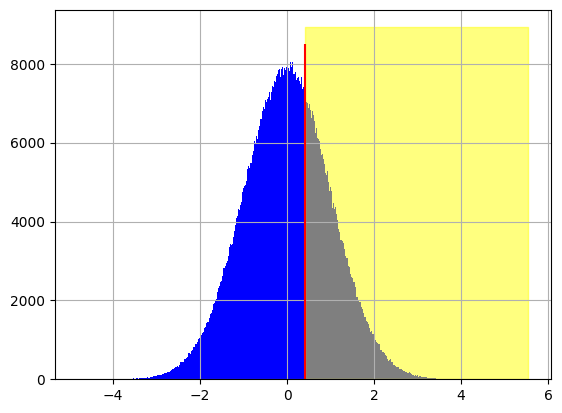

In [87]:
fig, axes = plt.subplots()
axes.hist(np.random.standard_normal(1_000_000), bins = 500, color = "blue")
axes.vlines(p, ymin = 0, ymax = 8500, color = "red")
axes.fill_betweenx(y = axes.get_ylim(), x1 = p, x2 = max(axes.get_xlim()), color = "yellow", alpha = 0.5)
axes.grid()
plt.show()

In [ ]:
# p value is way greater than the significance (alpha = 0.05)
# So, we cannot reject the Null hypothesis.

# Thus, we can conclude that the population proportion of ones is 0.54